# **Exploratory Data Analysis**

## **Imports**

In [1]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import librosa

## **A Quick Look at the Data**

In [2]:
df = pd.read_csv('data/samples.csv', index_col=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   file      750 non-null    object 
 1   length    750 non-null    float64
 2   class     750 non-null    object 
 3   class_id  750 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 23.6+ KB


### Class Distribution

Text(0.5, 1.0, 'Class Distribution')

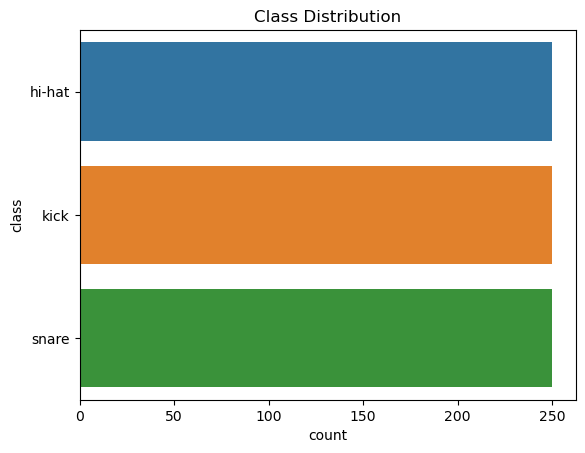

In [10]:
class_counts = pd.DataFrame(df['class'].value_counts()).reset_index()

sns.barplot(
    data = class_counts,
    x = 'count',
    y = 'class',
    orient = 'h',
    hue = 'class'
).set_title(
    'Class Distribution'
)


Text(0.5, 1.0, 'Distribution of Sample Lengths by Class')

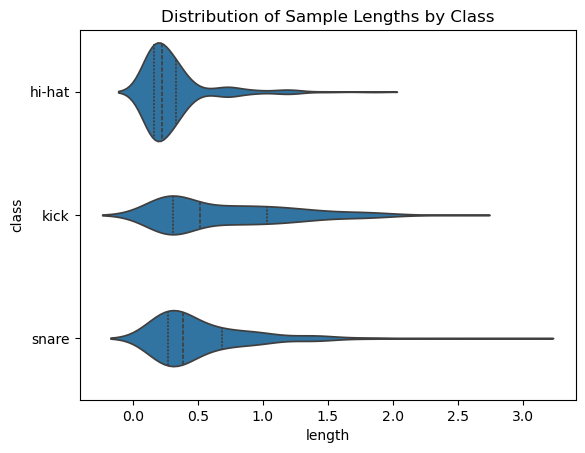

In [15]:
sns.violinplot(
    data = df,
    y = 'class',
    x = 'length',
    # hue = 'class',
    inner = 'quart'
).set_title(
    'Distribution of Sample Lengths by Class'
)

## **Extracting Information from Samples**

### Spectogram

In [4]:
spectrogram = T.Spectrogram(n_fft=512)

### MFCCs

In [5]:
n_fft = 2048
# hop_length = 512
n_mels = 256
n_mfcc = 256
sample_rate = 44100

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
        "n_fft": n_fft,
        "n_mels": n_mels,
        # "hop_length": hop_length,
    },
)

/home/vikram-linux/anaconda3/envs/drum-tracker/lib/python3.12/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (256) may be set too high. Or, the value for `n_freqs` (1025) may be set too low.
  warnings.warn(


### Loop through Samples

In [6]:
signals = {}
specs = {}
mfccs = {}

for label in df['class'].unique():
    class_df = df[df['class'] == label]
    f_names = class_df['file'].head(5).to_list()

    for f in f_names:
        signal, rate = torchaudio.load('data/raw/'+f)
        signals[f] = signal
        specs[f] = spectrogram(signal[0])
        mfccs[f] = mfcc_transform(signal)

## **Plotting Extracted Data**

### Plotting Waveforms

In [7]:
def plot_waveform(signal, rate=44100, title='Waveform', ax=None):
    signal = signal.numpy()
    n_channels, n_frames = signal.shape
    time_axis = torch.arange(0, n_frames) / rate

    if ax == None:
        ax = plt.gca()
    ax.plot(time_axis, signal[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)


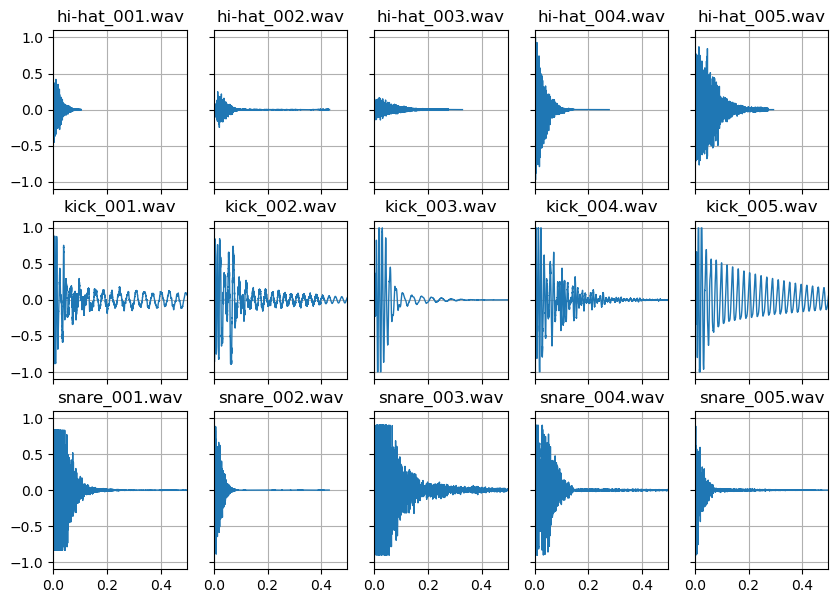

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, signal) in zip(axes, signals.items()):
    plot_waveform(signal, title=f_name, ax=ax)

### Plotting Spectrograms

In [9]:
def plot_spectrograms(spec, title='Spectrogram', ax=None):
    # spec = spectrogram(signal[0])

    if ax == None:
        ax = plt.gca()
    ax.imshow(
        librosa.power_to_db(spec),
        origin='lower', 
        aspect='auto'
        # interpolation='nearest'
    )
    ax.set_title(title)

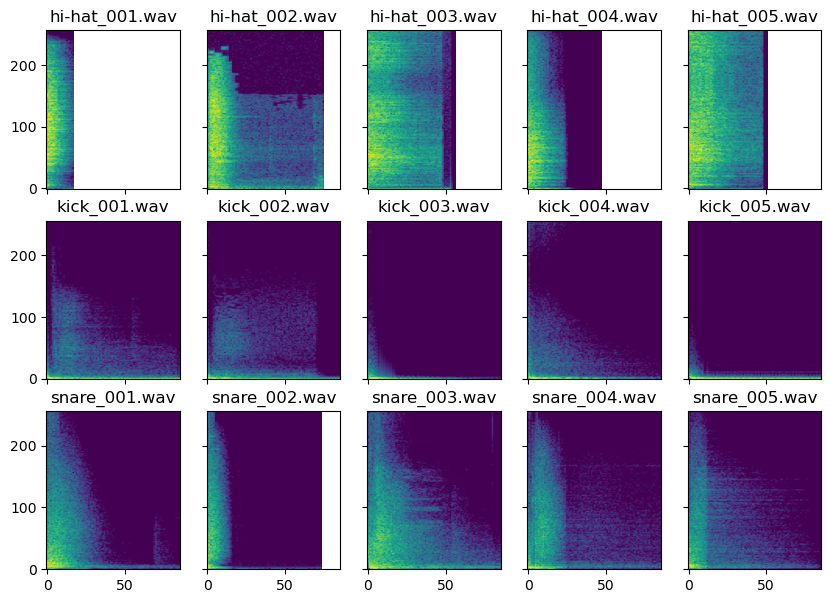

In [10]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, spec) in zip(axes, specs.items()):
    plot_spectrograms(spec, title=f_name, ax=ax)

### Plotting MFCCs

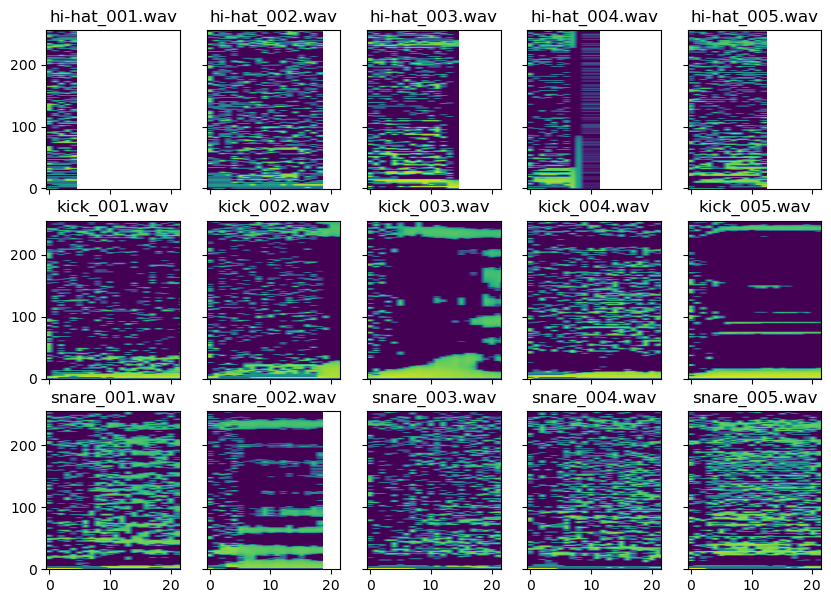

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, mfcc) in zip(axes, mfccs.items()):
    plot_spectrograms(mfcc[0], title=f_name, ax=ax)